<a href="https://colab.research.google.com/github/JeanAlvesR/DataScienceSamsung/blob/master/dataset_samsung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Import necessary libraries**


In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import plot_tree
import os
import warnings
import kagglehub
import os
import math

## **2. Import dataset**

### 2.1 Download Base


In [3]:


path = kagglehub.dataset_download("datatechexplorer/samsung-mobile-sales-dataset")

print("Path to dataset files:", path)

100%|██████████| 24.3k/24.3k [00:00<00:00, 28.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/datatechexplorer/samsung-mobile-sales-dataset/versions/1


### 2.2 Import do .csv com o PANDAS

In [4]:
df = pd.read_csv(os.path.join(path, "Expanded_Dataset.csv"))

## **3. General View of Imported Data**

### 3.1 First 5 Records

In [5]:
df.head()


,Year,Quarter,Product Model,5G Capability,Units Sold,Revenue ($),Market Share (%),Regional 5G Coverage (%),5G Subscribers (millions),Avg 5G Speed (Mbps),Preference for 5G (%),Region
0,2019,Q1,Galaxy S10,No,26396,4.212951e+06,1.04,57.36,39.55,293.10,55.87,Asia-Pacific
1,2019,Q1,Galaxy Note10,No,25671,7.240266e+06,2.82,85.80,42.58,67.46,37.26,Latin America
2,2019,Q1,Galaxy S20,No,16573,2.560833e+07,-0.03,47.02,3.78,77.25,84.66,Middle East & Africa
3,2019,Q1,Galaxy Note20,No,7177,2.198442e+07,0.84,25.70,23.41,105.27,40.03,North America
4,2019,Q1,Galaxy S21,No,45633,1.634244e+07,2.36,89.13,44.43,206.17,76.88,Latin America


###3.2 Last 5 Records

In [6]:
df.tail()

,Year,Quarter,Product Model,5G Capability,Units Sold,Revenue ($),Market Share (%),Regional 5G Coverage (%),5G Subscribers (millions),Avg 5G Speed (Mbps),Preference for 5G (%),Region
995,2023,Q4,Galaxy S22 5G,Yes,36216,2.995937e+07,3.82,70.59,46.92,177.43,63.86,Latin America
996,2022,Q2,Galaxy S21,No,33806,2.369938e+07,-0.23,77.31,47.51,129.70,78.41,North America
997,2022,Q1,Galaxy S10,No,23678,2.330203e+07,0.58,45.61,43.79,156.56,72.06,Europe
998,2023,Q4,Galaxy Note10,No,35697,1.946256e+07,2.49,36.55,36.44,236.39,47.11,North America
999,2020,Q4,Galaxy Note20,No,7473,1.962177e+07,3.88,74.66,27.55,177.22,72.36,North America


###3.3 Table structure information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       1000 non-null   int64  
 1   Quarter                    1000 non-null   object 
 2   Product Model              1000 non-null   object 
 3   5G Capability              1000 non-null   object 
 4   Units Sold                 1000 non-null   int64  
 5   Revenue ($)                1000 non-null   float64
 6   Market Share (%)           1000 non-null   float64
 7   Regional 5G Coverage (%)   1000 non-null   float64
 8   5G Subscribers (millions)  1000 non-null   float64
 9   Avg 5G Speed (Mbps)        1000 non-null   float64
 10  Preference for 5G (%)      1000 non-null   float64
 11  Region                     1000 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 93.9+ KB


### 3.4 Simple table calculations

In [8]:
df.describe()

,Year,Units Sold,Revenue ($),Market Share (%),Regional 5G Coverage (%),5G Subscribers (millions),Avg 5G Speed (Mbps),Preference for 5G (%)
count,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,2021.456000,32842.990000,3.019733e+07,3.723570,66.889720,30.152080,179.225560,67.14291
std,1.700281,16039.770572,1.837941e+07,1.991108,19.254095,14.537781,70.470934,15.75925
min,2019.000000,5309.000000,2.987436e+06,-0.490000,25.340000,-0.890000,50.370000,37.14000
25%,2020.000000,19327.250000,1.460749e+07,2.635000,50.400000,18.412500,120.410000,53.26750
50%,2021.000000,33689.000000,2.801200e+07,3.760000,67.050000,29.915000,177.390000,66.96000
75%,2023.000000,43911.000000,4.180391e+07,5.282500,83.210000,44.360000,238.860000,80.99000
max,2024.000000,64883.000000,8.426494e+07,6.950000,103.920000,54.940000,298.700000,94.84000


### 3.5 Check for any null values in the table

In [9]:
## df.isnull() returns the same table replacing the value with true or false,
## if true, it means the field is null
## .sum() returns the columns grouped with their sum.
## .any() checks if there is any null in the sum result
df.isnull().sum().any()

np.False_

## **4. Cardinality of Categorical Attributes**

### 4.0 info

Cardinality: It is the number of unique distinct values that a categorical column has. For example:

The "Quarter" column has 4 possible values: "Q1", "Q2", "Q3", "Q4".

The "5G Capability" column has only 2: "Yes" or "No".

### 4.1 Attribute Category Detection

In [10]:
##Descriptive type columns
object_type_columns = [col for col in df.columns if df[col].dtype == "object"]
object_type_columns

['Quarter', 'Product Model', '5G Capability', 'Region']

In [11]:
# Calculates the number of different items
cardinality = {col: df[col].nunique() for col in object_type_columns}
cardinality

# test = {col: df.groupby(col).size() for col in object_type_columns}
# test['Product Model']

{'Quarter': 4, 'Product Model': 15, '5G Capability': 2, 'Region': 5}

In [12]:
##More beautiful visualization
cardinality_df = pd.DataFrame(list(cardinality.items()), columns=['Column', 'Cardinality'])
cardinality_df

,Column,Cardinality
0,Quarter,4
1,Product Model,15
2,5G Capability,2
3,Region,5


<Axes: xlabel='Column', ylabel='Cardinality'>

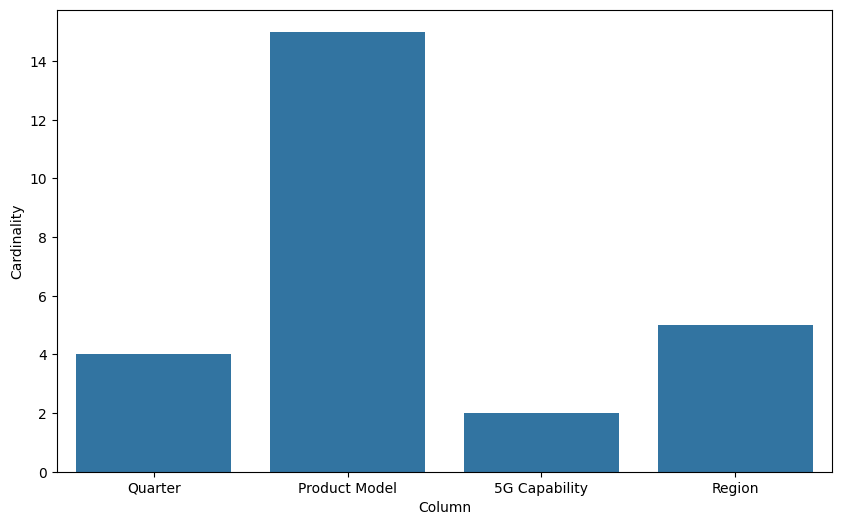

In [13]:
#Visualization of cardinality using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=cardinality_df['Column'], y=cardinality_df['Cardinality'])

## **5 Frequency of attributes**

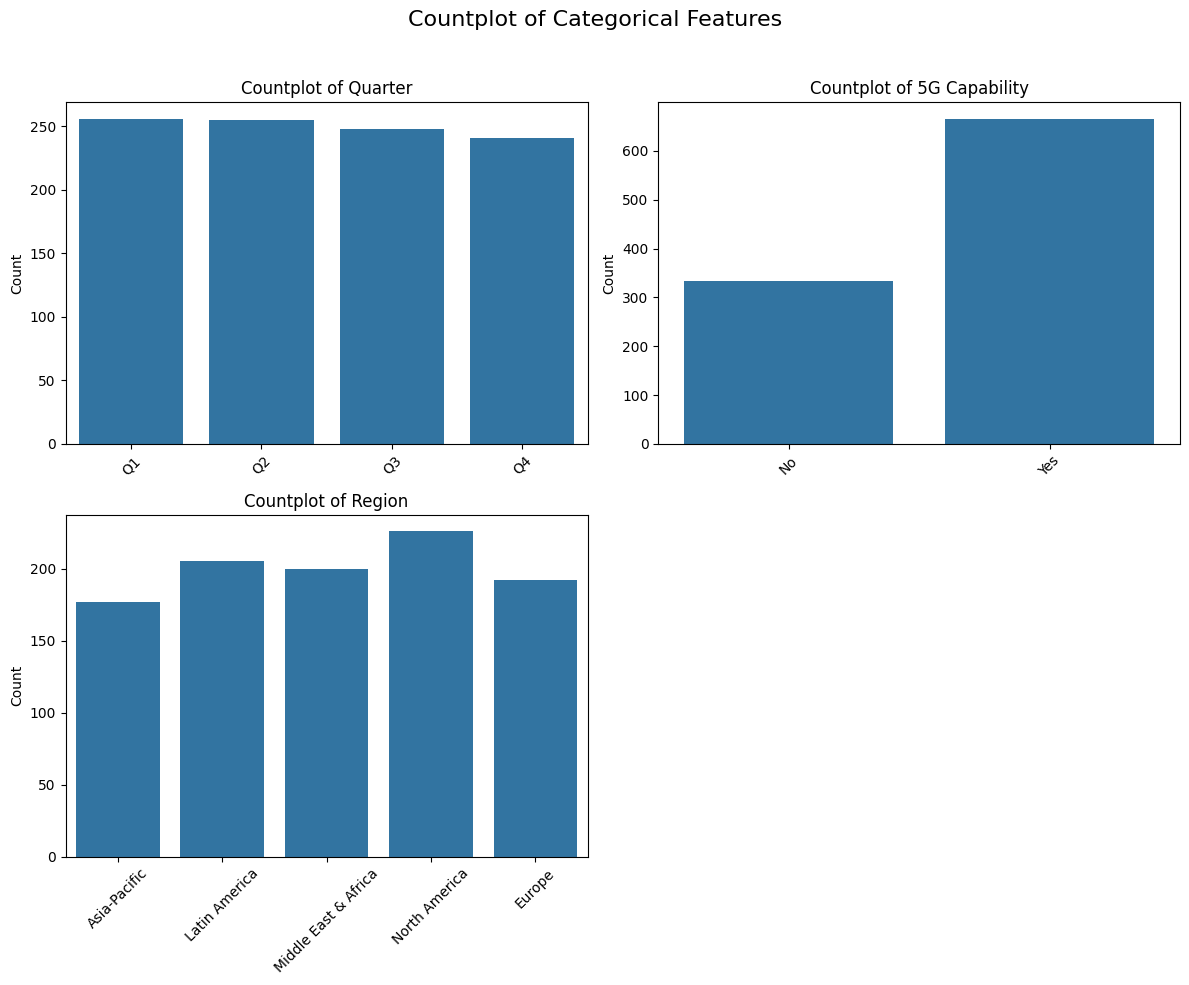

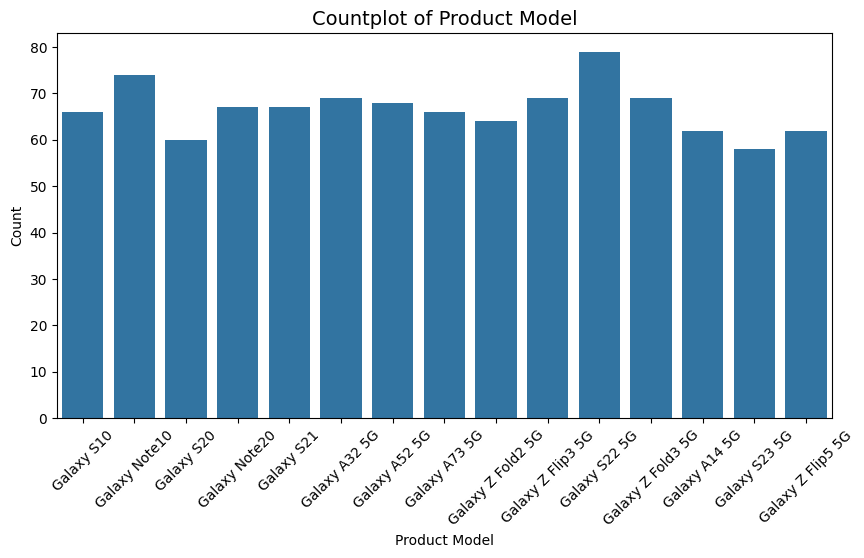

In [14]:
# Countplot visualization for categorical variables
LOW_CARDINALITY_LIMIT = 10
high_cardinality_column = next((col for col in object_type_columns if df[col].nunique() > LOW_CARDINALITY_LIMIT), None)
low_cardinality_columns = [col for col in object_type_columns if col != high_cardinality_column]

# Create subplots for low cardinality categorical features
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Countplot of Categorical Features", fontsize=16)
axes = axes.flatten()

for i, col in enumerate(low_cardinality_columns):
    sns.countplot(x=df[col], ax=axes[i])
    axes[i].set_title(f"Countplot of {col}", fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

# Hide the subplots that were not filled
for j in range(len(low_cardinality_columns), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

if high_cardinality_column:
  plt.figure(figsize=(10, 5))
  sns.countplot(x=df[high_cardinality_column])
  plt.title(f"Countplot of {high_cardinality_column}", fontsize=14)
  plt.xlabel(high_cardinality_column)
  plt.ylabel("Count")
  plt.xticks(rotation=45)
  plt.show()

## **6. Distribution of Units Sold**

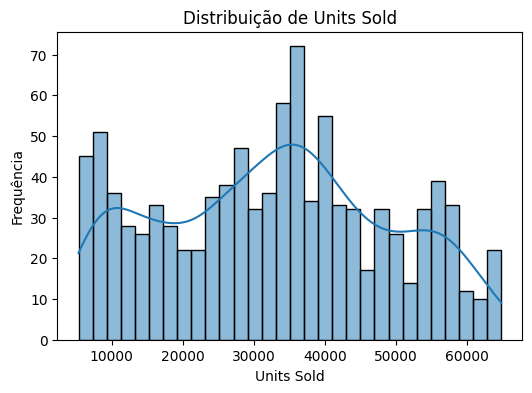

In [17]:
plt.figure(figsize=(6,4))
sns.histplot(df["Units Sold"], bins=30, kde=True)
plt.title("Distribution of Units Sold")
plt.xlabel("Units Sold")
plt.ylabel("Frequência")
plt.show()

## **7. Feature Selection and Engineering**

###7.1 Count Encoding on “Product Model”

In [21]:
df['Product_Model_Count'] = df['Product Model'].map(df['Product Model'].value_counts())

###7.2 One-Hot Encoding on Low-Cardinality Columns

In [63]:
df_ohe = pd.get_dummies(
    df,
    columns=low_cardinality_columns,
    drop_first=True
)
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         1000 non-null   int64  
 1   Product Model                1000 non-null   object 
 2   Units Sold                   1000 non-null   int64  
 3   Revenue ($)                  1000 non-null   float64
 4   Market Share (%)             1000 non-null   float64
 5   Regional 5G Coverage (%)     1000 non-null   float64
 6   5G Subscribers (millions)    1000 non-null   float64
 7   Avg 5G Speed (Mbps)          1000 non-null   float64
 8   Preference for 5G (%)        1000 non-null   float64
 9   Product_Model_Count          1000 non-null   int64  
 10  Quarter_Q2                   1000 non-null   bool   
 11  Quarter_Q3                   1000 non-null   bool   
 12  Quarter_Q4                   1000 non-null   bool   
 13  5G Capability_Yes  

### 7.3 Define Final Feature DataFrame

In [64]:
# Remove the column "Product Model" because the count of "Product Model" was already added.
if 'Product Model' in df_ohe.columns:
    df_ohe = df_ohe.drop(columns=['Product Model'])
y = df_ohe['Units Sold']
X = df_ohe.drop(columns=['Units Sold'])

## **8. Train-Test Split**

In [65]:
# Randomly split 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

##**9. Building a scikit-learn Pipeline**

###9.1 Definition of Column Groups

In [68]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols.remove('Units Sold')
categorical_cols = low_cardinality_columns

['Quarter', '5G Capability', 'Region']

###9.2 Build the ColumnTransformer

In [69]:
preprocessor = ColumnTransformer(transformers=[
    # 5.2.2. Standardization (StandardScaler) for all numerical columns
    ('scaler', StandardScaler(), num_cols)
], remainder='drop')  # ‘drop’ discards columns not in categorical_cols or num_cols

###9.3 Build Complete Pipeline

In [74]:
model_pipeline = Pipeline(steps=[
    ('preproc', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

## **10. Training the Baseline Model**

In [75]:
# 6.1. Fit the pipeline to the training data
model_pipeline.fit(X_train, y_train)

# 6.2. Make predictions on the test set
y_pred = model_pipeline.predict(X_test)

## **11. Evaluation of Metrics**

In [76]:
# 7.1. R²
r2 = r2_score(y_test, y_pred)

# 7.2. RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 7.3. MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)

print(f"R² no teste: {r2:.4f}")
print(f"RMSE no teste: {rmse:.2f}")
print(f"MAE no teste: {mae:.2f}")

R² no teste: 0.7356
RMSE no teste: 8297.48
MAE no teste: 5195.27


###11.1 Plot Predicted vs Actual

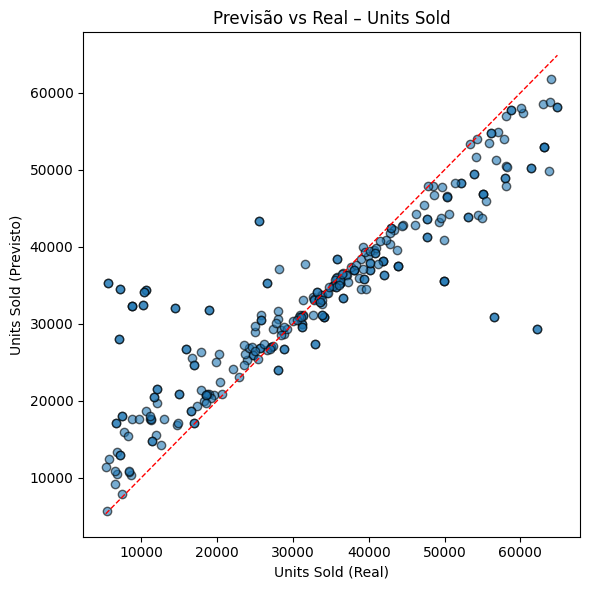

In [81]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=1)
plt.xlabel("Units Sold (Real)")
plt.ylabel("Units Sold (Previsto)")
plt.title("Previsão vs Real – Units Sold")
plt.tight_layout()
plt.show()

###11.2 Tree Visualization

In [85]:
# rf_model = model_pipeline.named_steps['model']


# for i in range(3):
#   tree = rf_model.estimators_[i]
#   # Plot tree
#   plt.figure(figsize=(20, 10))
#   plot_tree(tree,
#             feature_names=model_pipeline.named_steps['preproc'].get_feature_names_out(),
#             filled=True,
#             rounded=True,
#             max_depth=3)
#   plt.title("Visualização de uma árvore da Random Forest")
#   plt.show()

##**12. Search Hyperparameters**

In [99]:
from sklearn.model_selection import GridSearchCV

# 8.1. Define parameter grid for RandomForest
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 10]
}

# 8.2. GridSearch with 5-fold CV, using the pipeline
grid_search = GridSearchCV(
    estimator=model_pipeline,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',  # minimize RMSE
    cv=5,
    n_jobs=-1
)

# 8.3. Fit on the training data
grid_search.fit(X_train, y_train)

# 8.4. Display the best parameters
print("Best parameters found:")
print(grid_search.best_params_)

# 8.5. Evaluate the best_estimator_ on the test set
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

r2_best  = r2_score(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
mae_best = mean_absolute_error(y_test, y_pred_best)

print("==> After GridSearch")
print(f"R² on test set: {r2_best:.4f}")
print(f"RMSE on test set: {rmse_best:.2f}")
print(f"MAE on test set: {mae_best:.2f}")

Best parameters found:
{'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 200}
==> After GridSearch
R² on test set: 0.7291
RMSE on test set: 8398.72
MAE on test set: 5250.21


##**13. Interpretation**

Top 10 features by importance:
scaler__Revenue ($)                  0.200706
scaler__Avg 5G Speed (Mbps)          0.152817
scaler__Preference for 5G (%)        0.141004
scaler__Regional 5G Coverage (%)     0.140912
scaler__5G Subscribers (millions)    0.127568
scaler__Market Share (%)             0.119789
scaler__Product_Model_Count          0.064296
scaler__Year                         0.052908
dtype: float64


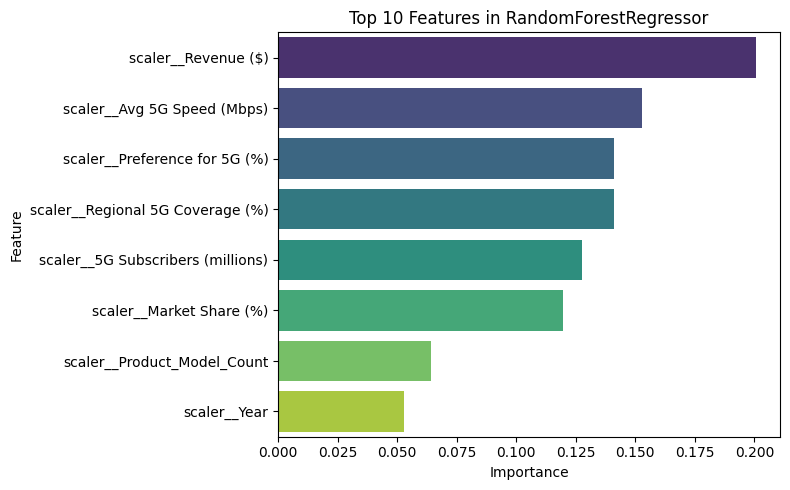

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 9.1. Get feature importances from the best trained RandomForest model
importances = best_model.named_steps['model'].feature_importances_

# 9.2. Retrieve the transformed column names from the pipeline
preproc = best_model.named_steps['preproc']

try:
    # Try to get the output feature names (works for sklearn >= 1.0)
    all_feature_names = preproc.get_feature_names_out()
except AttributeError:
    # If get_feature_names_out isn't available, fall back to original column names
    # This usually happens when no OneHotEncoder is used in the pipeline
    all_feature_names = X_train.columns.tolist()

# 9.3. Create a Series to sort the importances
feat_imp_series = pd.Series(importances, index=all_feature_names).sort_values(ascending=False)

# 9.4. Display the top 10 most important features
top10 = feat_imp_series.head(10)
print("Top 10 features by importance:")
print(top10)

# 9.5. Plot the top 10 as a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=top10.values, y=top10.index, palette='viridis')
plt.title("Top 10 Features in RandomForestRegressor")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
